In [2]:
import matplotlib.pyplot as plt

In [1]:
datos = "calleToledo2_2021.csv"
import pandas as pd
df = pd.read_csv(datos,sep=";",parse_dates=True)
df.index = pd.to_datetime(df["fecha"])
df

,id,fecha,tipo_elem,intensidad,ocupacion,carga,vmed,error,periodo_integracion
fecha,,,,,,,,,
2021-01-01 00:00:00,4709,2021-01-01 00:00:00,URB,68,2.0,6,0.0,N,15
2021-01-01 00:15:00,4709,2021-01-01 00:15:00,URB,55,1.0,5,0.0,N,12
2021-01-01 00:30:00,4709,2021-01-01 00:30:00,URB,108,3.0,10,0.0,N,15
2021-01-01 00:45:00,4709,2021-01-01 00:45:00,URB,96,1.0,9,0.0,N,15
2021-01-01 01:00:00,4709,2021-01-01 01:00:00,URB,140,3.0,13,0.0,N,15
...,...,...,...,...,...,...,...,...,...
2021-12-31 22:45:00,4709,2021-12-31 22:45:00,URB,120,4.0,11,0.0,N,15
2021-12-31 23:00:00,4709,2021-12-31 23:00:00,URB,113,4.0,10,0.0,N,15
2021-12-31 23:15:00,4709,2021-12-31 23:15:00,URB,88,2.0,8,0.0,N,15


In [7]:
df["hora"] = df.index.hour
df["dia"] = df.index.day
df["mes"] = df.index.month

In [8]:
df = df[df.intensidad<500]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = df.copy()
df2["intensidad"] = scaler.fit_transform(df2[["intensidad"]])
scaler = MinMaxScaler()
df2["ocupacion"] = scaler.fit_transform(df2[["ocupacion"]])
df2.describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,hora,dia,mes
count,34608.0,34608.000000,34608.000000,34608.000000,34608.0,34608.000000,34608.000000,34608.000000,34608.000000
mean,4709.0,0.396190,0.128502,22.758235,0.0,14.054641,11.533981,15.743007,6.563858
std,0.0,0.208994,0.152651,16.521905,0.0,2.103209,6.926606,8.807914,3.432084
min,4709.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000
25%,4709.0,0.195122,0.031915,10.000000,0.0,14.000000,6.000000,8.000000,4.000000
50%,4709.0,0.439024,0.074468,20.000000,0.0,15.000000,12.000000,16.000000,7.000000
75%,4709.0,0.569106,0.148936,30.000000,0.0,15.000000,18.000000,23.000000,10.000000
max,4709.0,1.000000,1.000000,95.000000,0.0,15.000000,23.000000,31.000000,12.000000


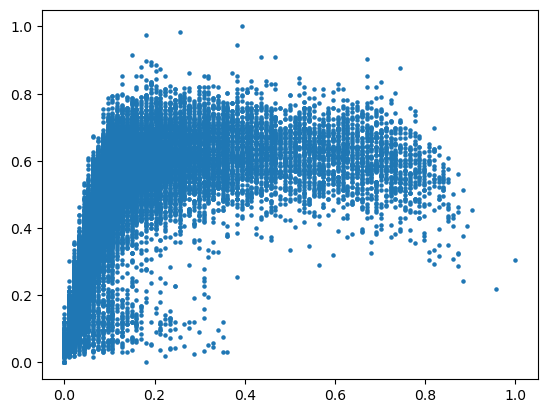

In [10]:
y = df2.intensidad
x = df2.ocupacion

plt.scatter(x,y,s=5)
plt.show()

In [12]:
import math
import numpy as np

df2["atasco"] = np.sqrt((df2["ocupacion"]-1)*(df2["ocupacion"]-1)+(df2["intensidad"]*df2["intensidad"]))
df2.describe()

,id,intensidad,ocupacion,carga,vmed,periodo_integracion,hora,dia,mes,atasco
count,34608.0,34608.000000,34608.000000,34608.000000,34608.0,34608.000000,34608.000000,34608.000000,34608.000000,34608.000000
mean,4709.0,0.396190,0.128502,22.758235,0.0,14.054641,11.533981,15.743007,6.563858,0.987819
std,0.0,0.208994,0.152651,16.521905,0.0,2.103209,6.926606,8.807914,3.432084,0.087573
min,4709.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,1.000000,0.223599
25%,4709.0,0.195122,0.031915,10.000000,0.0,14.000000,6.000000,8.000000,4.000000,0.980621
50%,4709.0,0.439024,0.074468,20.000000,0.0,15.000000,12.000000,16.000000,7.000000,0.995635
75%,4709.0,0.569106,0.148936,30.000000,0.0,15.000000,18.000000,23.000000,10.000000,1.032072
max,4709.0,1.000000,1.000000,95.000000,0.0,15.000000,23.000000,31.000000,12.000000,1.273899


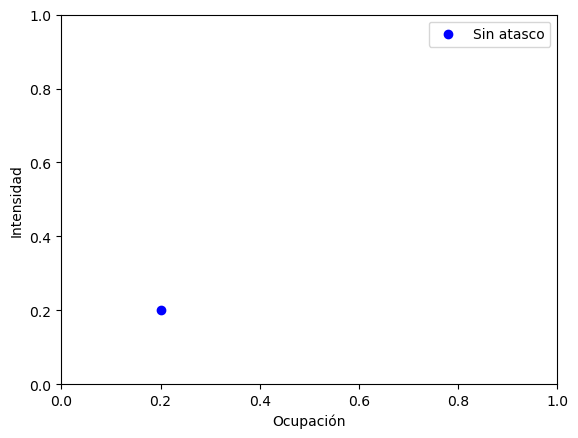

In [6]:
#sin atasco
y = 0.2
x = 0.2
plt.scatter(x,y,color="blue", label='Sin atasco')
#y = 0.8
#x = 0.2
#plt.scatter(x,y,color="blue")
#plt.scatter(x,y,color="blue")
#y = 0.6
#x = 0.5
#plt.scatter(x,y,color="blue")


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ocupación")
plt.ylabel("Intensidad")
plt.legend(loc="upper right")
plt.show()

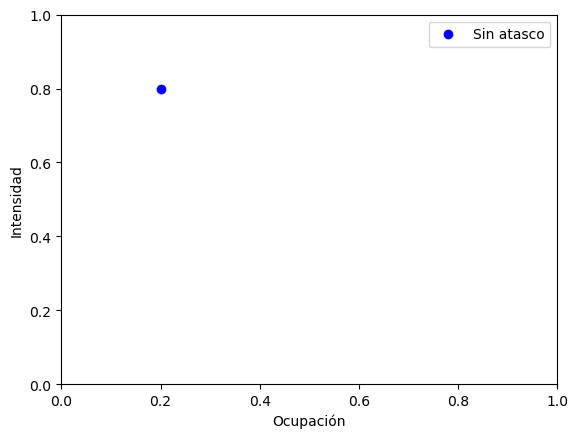

In [7]:
#sin atasco
#y = 0.2
#x = 0.2
#plt.scatter(x,y,color="blue", label='Sin atasco')
y = 0.8
x = 0.2
plt.scatter(x,y,color="blue", label='Sin atasco')
#plt.scatter(x,y,color="blue")
#y = 0.6
#x = 0.5
#plt.scatter(x,y,color="blue")


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ocupación")
plt.ylabel("Intensidad")
plt.legend(loc="upper right")
plt.show()

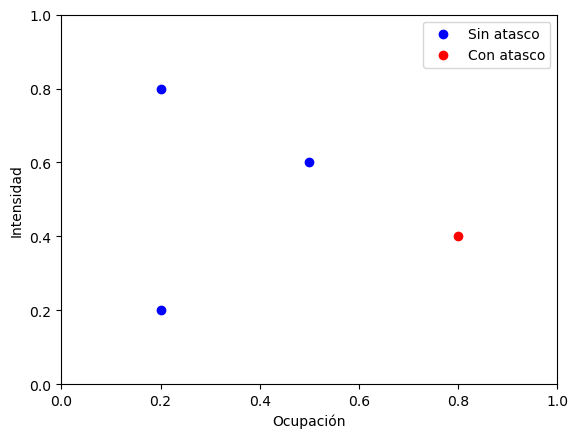

In [3]:
import matplotlib.pyplot as plt
#sin atasco
y = 0.2
x = 0.2
plt.scatter(x,y,color="blue", label='Sin atasco')
y = 0.8
x = 0.2
plt.scatter(x,y,color="blue")
y = 0.6
x = 0.5
plt.scatter(x,y,color="blue")

#con atasco
y = 0.4
x = 0.8
plt.scatter(x,y,color="red", label='Con atasco')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ocupación")
plt.ylabel("Intensidad")
plt.legend(loc="upper right")
plt.show()

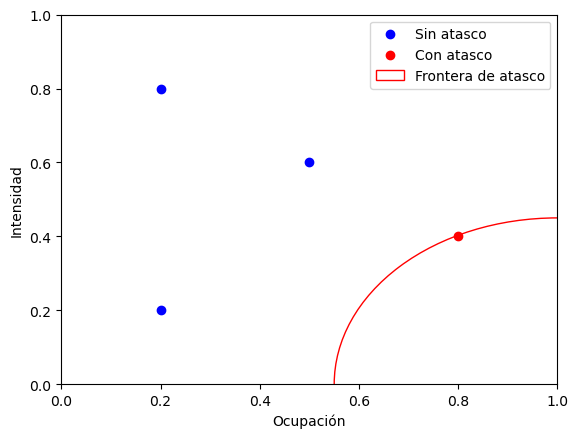

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#sin atasco
y = 0.2
x = 0.2
plt.scatter(x,y,color="blue", label='Sin atasco')
y = 0.8
x = 0.2
plt.scatter(x,y,color="blue")
y = 0.6
x = 0.5
plt.scatter(x,y,color="blue")

#con atasco
y = 0.4
x = 0.8
plt.scatter(x,y,color="red", label='Con atasco')

circle = plt.Circle((1, 0), 0.45, color='r', fill=False, label='Frontera de atasco')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ocupación")
plt.ylabel("Intensidad")
ax.add_patch(circle)
plt.legend(loc="upper right")
ax.legend(loc="upper right")
plt.show()

In [5]:
import math
import numpy as np
def  distancia(row):
    print(row)
    x = row[1]["ocupacion"]
    y = row[1]["intensidad"]
    # distancia a (1,0)
    d = math.sqrt(y*y+(x-1)*(x-1))
    return d

df2["atasco"] = (np.sqrt(2)-np.sqrt((df2["ocupacion"]-1)*(df2["ocupacion"]-1)+(df2["intensidad"]*df2["intensidad"])))/np.sqrt(2)
df2.describe()

NameError: name 'df2' is not defined

In [ ]:
from os import listdir
from os.path import isfile, join
path = "C:/Users/jonay/Desktop/Master_IoT/TFM"
df2.to_csv(join(path,"Toledo2.csv"),index=False)

In [ ]:
y = df2.intensidad
x = df2.ocupacion

plt.scatter(x,y,s=5)
df3 = df2[df2.atasco>0.6]

y = df3.intensidad
x = df3.ocupacion

plt.scatter(x,y,s=5,color="red")

plt.show()

In [ ]:
df3.sort_values(by=["atasco"],ascending=False)

In [ ]:
dfout = df[(df.dia==18) & (df.mes==11)]
dfout[["ocupacion","intensidad"]].plot()

In [ ]:
df3.shape, df2.shape

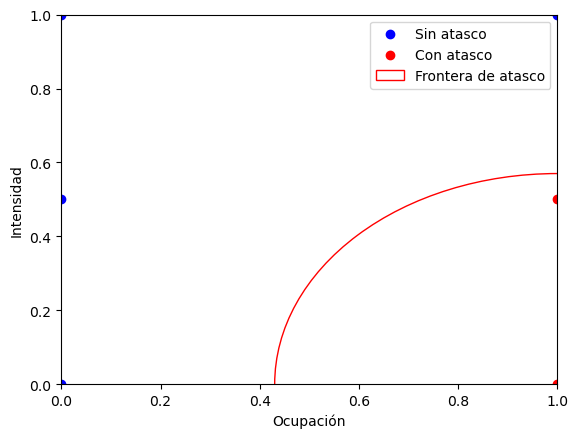

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#sin atasco
y = 0
x = 0
plt.scatter(x,y,color="blue", label='Sin atasco')
y = 0.5
x = 0
plt.scatter(x,y,color="blue")
y = 1
x = 0
plt.scatter(x,y,color="blue")
y = 1
x = 1
plt.scatter(x,y,color="blue")

#con atasco
y = 0.5
x = 1
plt.scatter(x,y,color="red", label='Con atasco')
y = 0
x = 1
plt.scatter(x,y,color="red")

circle = plt.Circle((1, 0), 0.57, color='r', fill=False, label='Frontera de atasco')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("Ocupación")
plt.ylabel("Intensidad")
ax.add_patch(circle)
plt.legend(loc="upper right")
ax.legend(loc="upper right")
plt.show()